In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', size=14)

In [3]:
# y=x line (intercept and slope)
a, b = 0, 1

# Random noisy data
N = 400

data = np.random.multivariate_normal([0,0], [[5,0] , [0,0.2]], N)
x = data[:,0]
y = data[:,1]

phi = np.radians(-45)
cosph = np.cos(phi)
sinph = np.sin(phi)
x, y = x*cosph + y*sinph + 5, -x*sinph + y*cosph + 5

# perpendicular distance of each point from the line.
# This is for an arbitrary fit line of slope b and intercept a,
# even though we only care in this case about y=x.
dist = (a + b*x - y) / np.sqrt(1 + b**2)

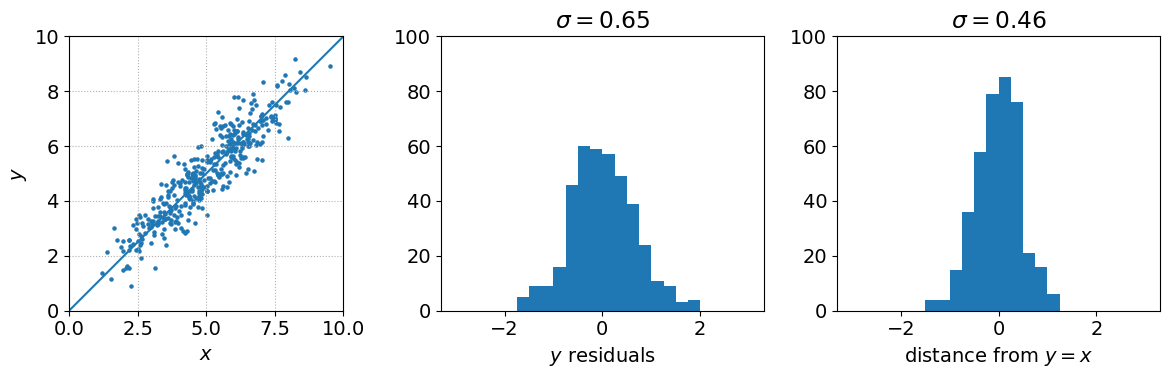

In [4]:
fig, axes = plt.subplots(1,3, figsize=(12,4), tight_layout=True)

# Scatterplot + data
ax = axes[0]
ax.scatter(x, y, s=5)
ax.plot([0,10], [0,10])
ax.set(aspect='equal',
       xlim=(0,10), ylim=(0,10),
       xlabel='$x$', ylabel='$y$')
ax.grid(ls=':')

# Histogram of y-residuals
ax = axes[1]
dy = y - (a+b*x)
ax.hist(dy, bins=np.arange(-3,3.25,0.25))
ax.set(xlabel='$y$ residuals',
       ylim=(0,100),
       title=f'$\sigma={np.std(dy):.2f}$')

# Histogram of orthogonal distance from y=x line.
ax = axes[2]
ax.hist(dist, bins=np.arange(-3,3.25,0.25))
ax.set(xlabel='distance from $y=x$',
       ylim=(0,100),
       title=f'$\sigma={np.std(dist):.2f}$');